In [2]:
from __future__ import print_function
from __future__ import division

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

# Carregar os Datasets

In [3]:
# URL pro raw csv que ta no git
url_bom = './datasets/oficial/mov_bom/david/myo-movimento-david-2019-06-14 10:20:51-.csv'
# Dataset is now stored in a Pandas Dataframe
url_ruim = './datasets/oficial/mov_ruim/david/myo-movimento-david-ruim-2019-06-14 10:41:12-.csv'

#Pandas dataset
Dataset_bom = pd.read_csv(url_bom)
Dataset_ruim = pd.read_csv(url_ruim)

print("Dataset Bom")
print (Dataset_bom.head())

print("\nDataset Ruimn")
print (Dataset_ruim.head())


Dataset Bom
   Unnamed: 0  Gyro 0  Gyro 1  Gyro 2  Label  Orientation 0  Orientation 1  \
0           0    -8.0     2.0    27.0    1.0        -8081.0       -13068.0   
1           1    -8.0     2.0    27.0    1.0        -8081.0       -13068.0   
2           2    -8.0     2.0    27.0    1.0        -8081.0       -13068.0   
3           3    -8.0     2.0    27.0    1.0        -8081.0       -13068.0   
4           4    -8.0     2.0    27.0    1.0        -8081.0       -13068.0   

   Orientation 2  Orientation 3  Sensor 0  Sensor 1  Sensor 2  Sensor 3  \
0         2098.0        -5290.0      -7.0     -13.0      -5.0      -2.0   
1         2098.0        -5290.0     -11.0     -11.0      -1.0       6.0   
2         2098.0        -5290.0      -2.0       7.0      12.0       0.0   
3         2098.0        -5290.0       1.0      24.0      44.0      19.0   
4         2098.0        -5290.0      12.0      18.0      -2.0       0.0   

   Sensor 4  Sensor 5  Sensor 6  Sensor 7  Timestamp  
0     -18.0  

# Plot dos sensores do movimento bom

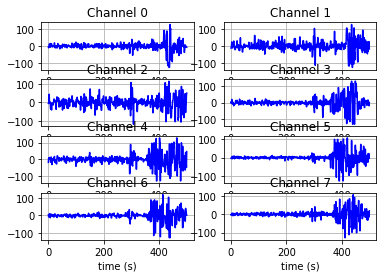

In [4]:
ax = np.linspace(0, 500, 500, endpoint=True)
for i in range(8):
    plt.subplot(4,2,i+1)
    plt.title("Channel "+str(i))
    plt.xlabel("time (s)")
    column = "Sensor "+str(i)
    l = list(Dataset_bom.get(column))
    plt.plot(ax, l,"blue")
    plt.grid()

plt.draw()
plt.show()

# Plot dos sensores do movimento ruim

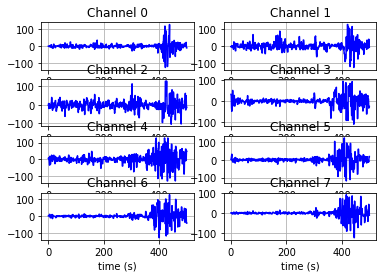

In [5]:
ax = np.linspace(0, 500, 500, endpoint=True)
for i in range(8):
    plt.subplot(4,2,i+1)
    plt.title("Channel "+str(i))
    plt.xlabel("time (s)")
    column = "Sensor "+str(i)
    l = list(Dataset_ruim.get(column))
    plt.plot(ax, l,"blue")
    plt.grid()

plt.draw()
plt.show()

# FFT

In [29]:
def apply_fft(data, comment):
    plt.figure(figsize=(15,8))
    plt.title('FFT - ' + comment, fontsize=30)
    plt.xlabel('Frequência (Hz)', fontsize=20)
    plt.ylabel('Amplitude', fontsize=20)
    plt.plot(abs(np.fft.rfft(data)))
    plt.xlim(0, 100)
    plt.grid()
    plt.show()
    return abs(np.fft.rfft(data))

high_band = 72/2.5
mid_band = 58/2.5
low_band = 5/2.5
sfreq = 200

In [30]:
def subtract_fft(first, second):
    s = first - second
    plt.figure(figsize=(15,8))
    plt.title('FFT - Subtraídas', fontsize=30)
    plt.xlabel('Frequência (Hz)', fontsize=20)
    plt.ylabel('Amplitude', fontsize=20)
    plt.plot(s)
    plt.xlim(0, 100)
    plt.grid()
    plt.show()

# Plot dos gráficos filtrados

## Filtro

In [56]:
# Normalização das frequencias: https://stackoverflow.com/questions/31736839/python-bandpass-filter-singular-matrix-error
# Função do filtro https://stackoverflow.com/questions/44251232/audio-buffer-finite-error-after-butter-filtering-scipy

import scipy as sp
from scipy import signal

# 500 amostras a uma frequencia de 200hz
# tempo = 500/200 = 2,5 segundos
# intervalo entre as amostras = 2.5/500 = 0,005

time = np.arange(0, 2.5, 0.005)

def filteremg(time, emg, sfreq=200, high_band=72, mid_band=58, low_band=5):
    """
    time: Time data
    emg: EMG data
    high: high-pass cut off frequency
    low: low-pass cut off frequency
    sfreq: sampling frequency
    """
    # create bandpass filter for EMG for first 5hz
    low_band = low_band/(sfreq/2)
    #b1, a1 = sp.signal.butter(4, low_band, btype='highpass')
    #emg_filtered = sp.signal.filtfilt(b1, a1, emg)
    sos = sp.signal.butter(2, low_band, btype='highpass', output='sos')
    emg_filtered = sp.signal.sosfilt(sos, emg)
    
    # normalise cut-off frequencies to sampling frequency
    high_band = high_band/(sfreq/2)
    mid_band = mid_band/(sfreq/2)
    print(high_band, mid_band)

    # create second bandpass filter for EMG
    #b1, a1 = sp.signal.butter(2, [mid_band, high_band], btype='bandstop')
    #emg_filtered2 = sp.signal.filtfilt(b1, a1, emg_filtered)
    sos = sp.signal.butter(2, [mid_band, high_band], btype='bandstop', output='sos')
    emg_filtered2 = sp.signal.sosfilt(sos, emg_filtered)
    
    # plot graphs
    fig = plt.figure(figsize=(14,6))
    plt.subplot(1, 3, 1)
    plt.subplot(1, 3, 1).set_title('EMG não filtrado')
    plt.plot(time, emg)
    plt.locator_params(axis='x', nbins=4)
    plt.locator_params(axis='y', nbins=4)
    plt.ylim(-127, 127)
    plt.xlabel('Tempo (s)')
    plt.ylabel('EMG')
    
    plt.subplot(1, 3, 2)
    plt.subplot(1, 3, 2).set_title('Passa-altas em 5Hz')
    plt.plot(time, emg_filtered)
    plt.locator_params(axis='x', nbins=4)
    plt.locator_params(axis='y', nbins=4)
    plt.ylim(-127, 127)
    plt.xlabel('Tempo (s)')
    
    plt.subplot(1, 3, 3)
    plt.subplot(1, 3, 3).set_title('Filtrado')
    plt.plot(time, emg_filtered2)
    plt.locator_params(axis='x', nbins=4)
    plt.locator_params(axis='y', nbins=4)
    plt.ylim(-127, 127)
    plt.xlabel('Tempo (s)')
    
    return emg_filtered2


### Gráfico do Movimento Bom Filtrado

0.28800000000000003 0.23199999999999998


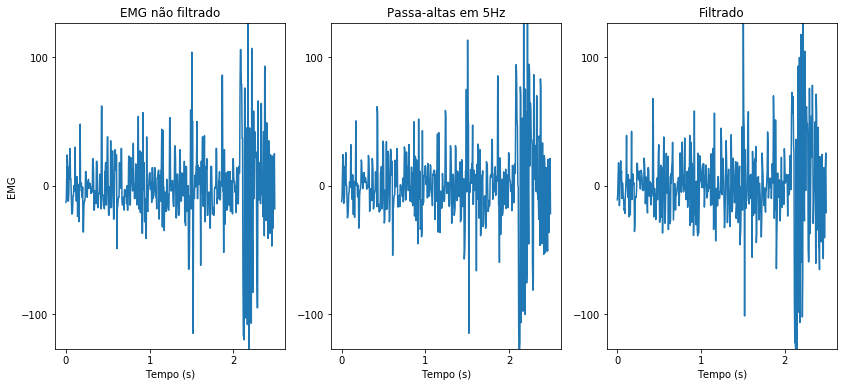

In [57]:
emg_filtered_all_bom = filteremg(time, Dataset_bom['Sensor 1'], low_band=low_band, mid_band=mid_band, high_band=high_band, sfreq=sfreq)

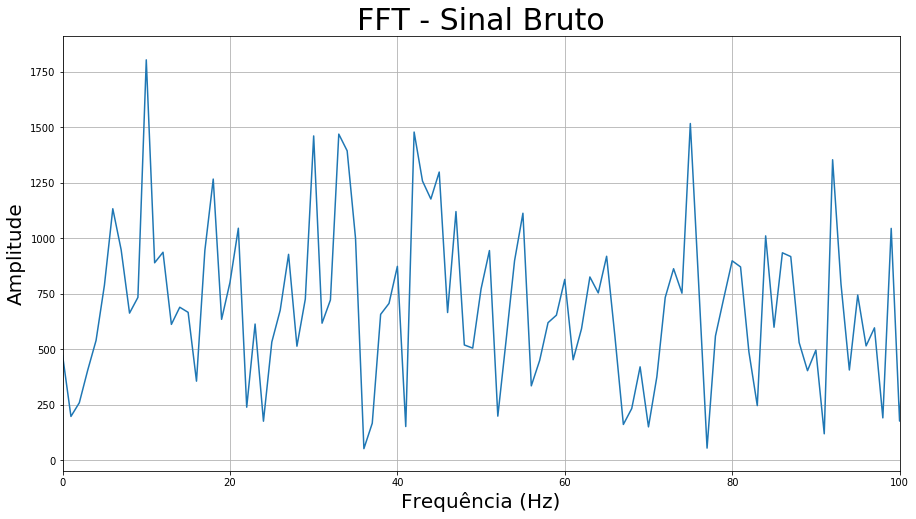

In [55]:
first = apply_fft(Dataset_bom['Sensor 1'], comment = 'Sinal Bruto')

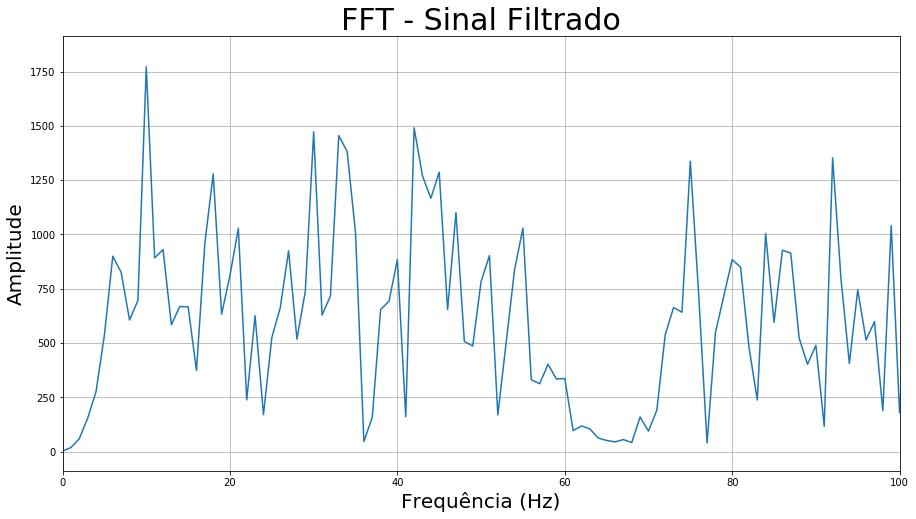

In [43]:
second = apply_fft(emg_filtered_all_bom, comment = 'Sinal Filtrado')

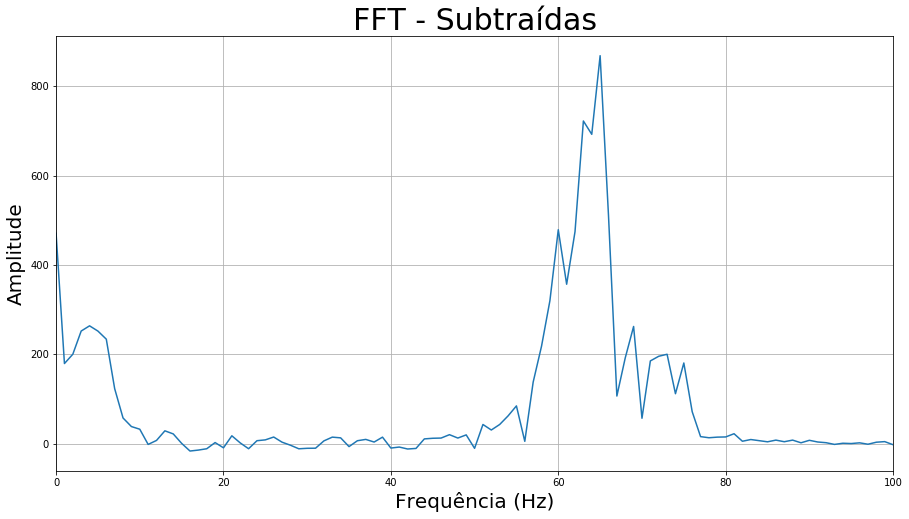

In [44]:
subtract_fft(first, second)

### Gráfico do Movimento Ruim Filtrado

0.28800000000000003 0.23199999999999998


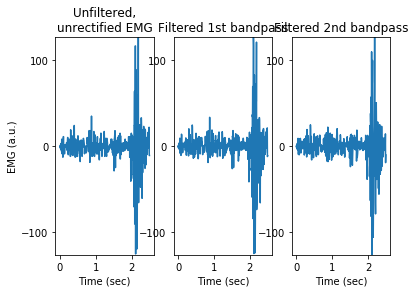

In [45]:
emg_filtered_all_ruim = filteremg(time, Dataset_ruim['Sensor 0'], low_band=low_band, mid_band=mid_band, high_band=high_band)

# Wilson Amplitude

In [104]:
def print_dados(emg):
    
    s0 = np.array(emg['Sensor 0'])
    s1 = np.array(emg['Sensor 1'])
    s2 = np.array(emg['Sensor 2'])
    s3 = np.array(emg['Sensor 3'])
    s4 = np.array(emg['Sensor 4'])
    s5 = np.array(emg['Sensor 5'])
    s6 = np.array(emg['Sensor 6'])
    s7 = np.array(emg['Sensor 7'])
    
    nSamples = 500
    sRate = 200
    eixo_x = np.linspace(0, nSamples/sRate, nSamples, endpoint=True)
    
    plt.figure(figsize=(15,10))
    
    plt.subplot(2, 4, 1)
    plt.plot(eixo_x, s0)
    plt.title('Sensor 0')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Amplitude')
    plt.subplot(2, 4, 2)
    plt.plot(eixo_x, s1)
    plt.title('Sensor 1')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Amplitude')
    plt.subplot(2, 4, 3)
    plt.plot(eixo_x, s2)
    plt.title('Sensor 2')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Amplitude')
    plt.subplot(2, 4, 4)
    plt.plot(eixo_x, s3)
    plt.title('Sensor 3')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Amplitude')
    plt.subplot(2, 4, 5)
    plt.plot(eixo_x, s4)
    plt.title('Sensor 4')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Amplitude')
    plt.subplot(2, 4, 6)
    plt.plot(eixo_x, s5)
    plt.title('Sensor 5')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Amplitude')
    plt.subplot(2, 4, 7)
    plt.plot(eixo_x, s6)
    plt.title('Sensor 6')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Amplitude')
    plt.subplot(2, 4, 8)
    plt.plot(eixo_x, s7)
    plt.title('Sensor 7')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Amplitude')
    plt.subplots_adjust(wspace=0.5, hspace=0.7)
    plt.show()

In [105]:
def wilson_amplitude(emg, th):
    sensor = []
    inds = 0
    ind = 0
    df2 = emg.copy()

    s0 = np.array(emg['Sensor 0'])
    s1 = np.array(emg['Sensor 1'])
    s2 = np.array(emg['Sensor 2'])
    s3 = np.array(emg['Sensor 3'])
    s4 = np.array(emg['Sensor 4'])
    s5 = np.array(emg['Sensor 5'])
    s6 = np.array(emg['Sensor 6'])
    s7 = np.array(emg['Sensor 7'])

    ind_th0 = (s0 < th) & (-th < s0)
    ind_th1 = (s1 < th) & (-th < s1)
    ind_th2 = (s2 < th) & (-th < s2)
    ind_th3 = (s3 < th) & (-th < s3)
    ind_th4 = (s4 < th) & (-th < s4)
    ind_th5 = (s5 < th) & (-th < s5)
    ind_th6 = (s6 < th) & (-th < s6)
    ind_th7 = (s7 < th) & (-th < s7)
    s0[ind_th0] = 0
    s1[ind_th1] = 0
    s2[ind_th2] = 0
    s3[ind_th3] = 0
    s4[ind_th4] = 0
    s5[ind_th5] = 0
    s6[ind_th6] = 0
    s7[ind_th7] = 0

    df2['Sensor 0'] = s0
    df2['Sensor 1'] = s1
    df2['Sensor 2'] = s2
    df2['Sensor 3'] = s3
    df2['Sensor 4'] = s4
    df2['Sensor 5'] = s5
    df2['Sensor 6'] = s6
    df2['Sensor 7'] = s7

    nSamples = 500
    sRate = 200
    eixo_x = np.linspace(0, nSamples/sRate, nSamples, endpoint=True)

    plt.figure(figsize=(15,10))
    
    plt.subplot(2, 4, 1)
    plt.plot(eixo_x, s0)
    plt.title('Sensor 0')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Amplitude')
    plt.subplot(2, 4, 2)
    plt.plot(eixo_x, s1)
    plt.title('Sensor 1')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Amplitude')
    plt.subplot(2, 4, 3)
    plt.plot(eixo_x, s2)
    plt.title('Sensor 2')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Amplitude')
    plt.subplot(2, 4, 4)
    plt.plot(eixo_x, s3)
    plt.title('Sensor 3')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Amplitude')
    plt.subplot(2, 4, 5)
    plt.plot(eixo_x, s4)
    plt.title('Sensor 4')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Amplitude')
    plt.subplot(2, 4, 6)
    plt.plot(eixo_x, s5)
    plt.title('Sensor 5')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Amplitude')
    plt.subplot(2, 4, 7)
    plt.plot(eixo_x, s6)
    plt.title('Sensor 6')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Amplitude')
    plt.subplot(2, 4, 8)
    plt.plot(eixo_x, s7)
    plt.title('Sensor 7')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Amplitude')
    plt.subplots_adjust(wspace=0.5, hspace=0.7)
    plt.show()



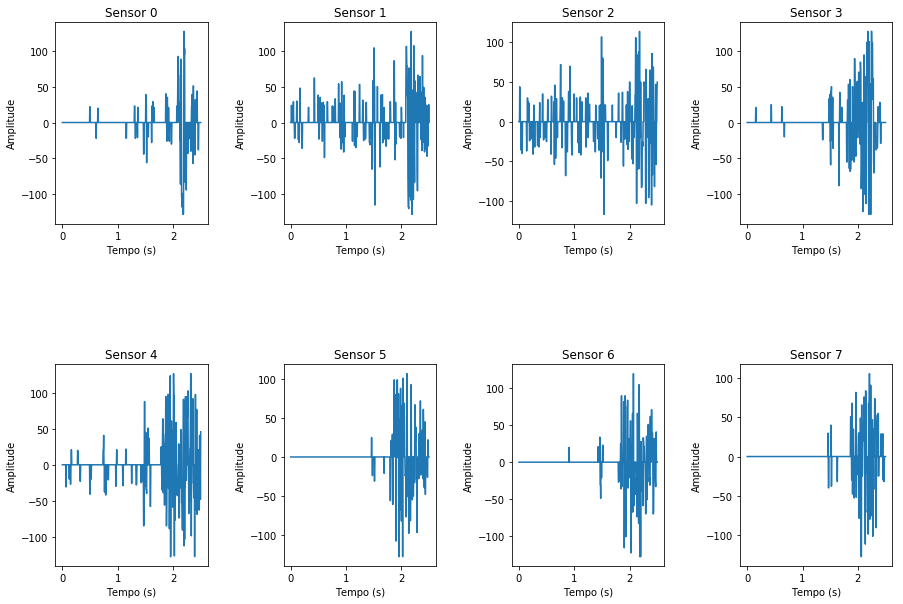

In [106]:
wilson_amplitude(Dataset_bom, th=20)

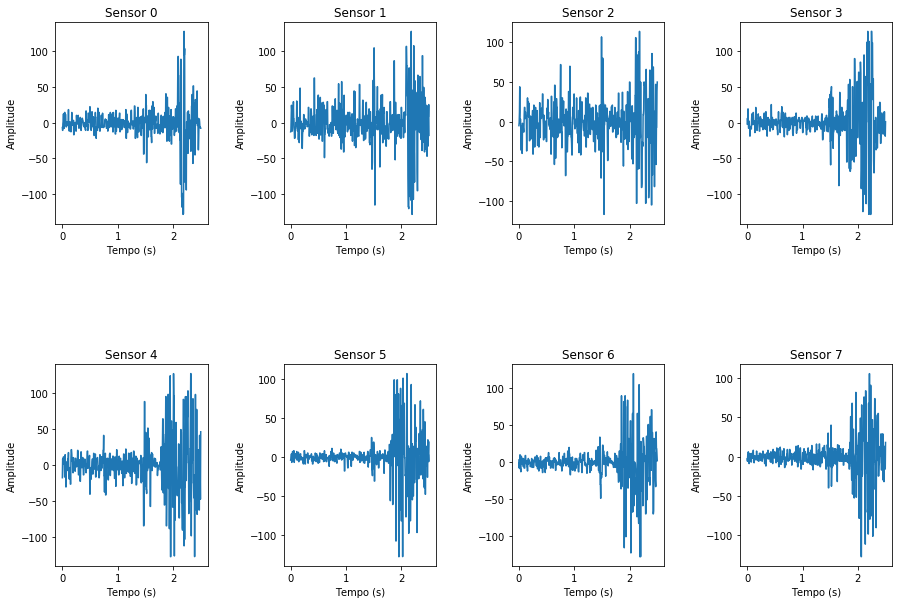

In [107]:
print_dados(Dataset_bom)

# Carregar csv das features ( preprocessado fora do jupyter)

In [157]:
url = './datasets/oficial/features_certo_balanced.csv'
url_wilson = './datasets/oficial/features_wilson_balanced.csv'
# Dataset is now stored in a Pandas Dataframe

#Pandas dataset
Dataset_0 = pd.read_csv(url)
Dataset = Dataset_0.drop('Label',axis=1)
# print(Dataset.head(10))
Dataset = Dataset.fillna(0)
print(Dataset.iloc[30:35, :])

#Pandas dataset
Dataset_0_wilson = pd.read_csv(url_wilson)
Dataset_wilson = Dataset_0.drop('Label',axis=1)
# print(Dataset.head(10))
Dataset_wilson = Dataset_wilson.fillna(0)
print(Dataset.iloc[30:35, :])

from sklearn.decomposition import PCA
X = Dataset.values
X_w = Dataset_wilson.values
# print(X)
pca = PCA(n_components=6)
fit = pca.fit_transform(X)
fit2 = pca.fit(X)
print("Explained Variance: ", fit2.explained_variance_ratio_)
# print(fit.components_)
print(sum(fit2.explained_variance_ratio_))

principalDf = pd.DataFrame(data=fit, columns=['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6'])

finalDf = pd.concat([principalDf, Dataset_0['Label']], axis=1)

    Gyro 0 Variance  Gyro 1 Variance  Gyro 2 Variance  Orientation 0 Variance  \
30      2482.891812      1621.473616      2517.878700             3087.238553   
31      1595.237429      2366.357589      2321.559837             3230.062798   
32      1935.248018      2229.060589      2022.275605             6556.322008   
33      1956.524006      2212.553418      2179.692473             2737.566113   
34      2033.301513      1753.535461      2472.769893             4345.893721   

    Orientation 1 Variance  Orientation 2 Variance  Orientation 3 Variance  \
30             4346.030820             5738.696990             4910.021965   
31             4503.615696             5492.256021             5078.981694   
32             5270.423525             7224.488684             5324.325039   
33             3952.410759             5675.569646             4925.960359   
34             4345.568443             5723.199280             5052.738889   

    Sensor 0 Variance  Sensor 1 Variance  Se

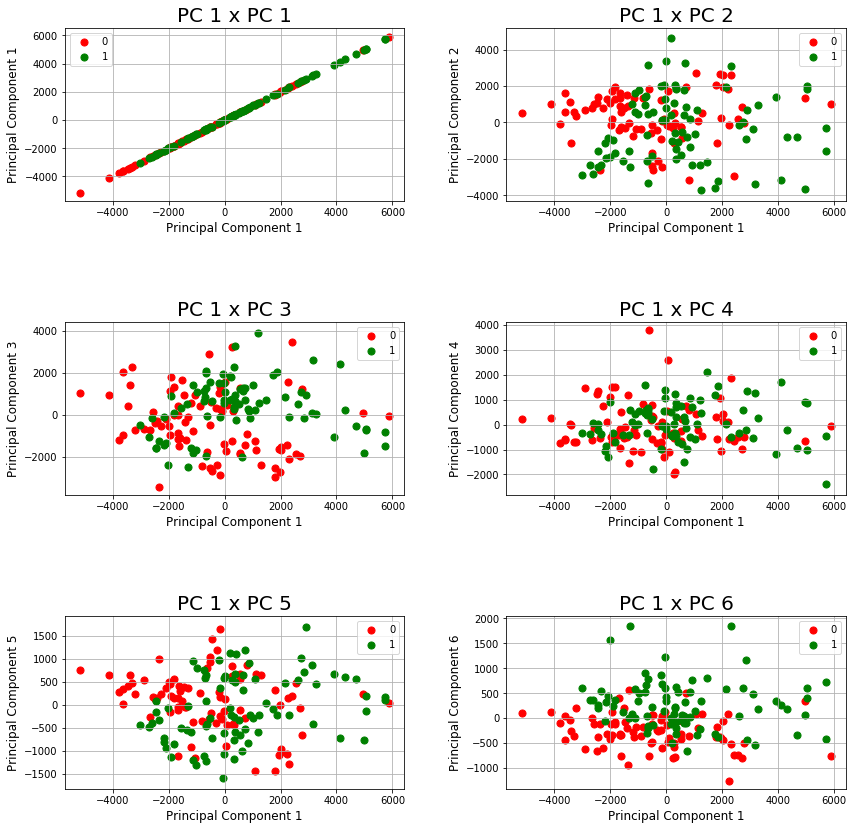

In [158]:
pca_index = '1'

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(14,14))
plt.subplots_adjust(wspace=0.3, hspace=0.7)
row = 0
col = 0
for i in range(6):
    #fig = plt.figure(figsize = (8,8))
    if i%2 == 0:
        col =0
    else:
        col=1
#     print(row,col)
    #index_1 = str(i +1)
    ax[row,col].set_xlabel('Principal Component ' + pca_index, fontsize = 12)
    ax[row,col].set_ylabel('Principal Component '+ str(i+1), fontsize = 12)
    ax[row,col].set_title('PC {} x PC {}'.format(pca_index, i+1), fontsize = 20)
    targets = [0, 1]
    colors = ['r', 'g']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['Label'] == target
        ax[row,col].scatter(finalDf.loc[indicesToKeep, 'Feature '+pca_index]
                   , finalDf.loc[indicesToKeep,'Feature '+ str(i+1)]
                   , c = color
                   , s = 50)
    ax[row,col].legend(targets)
    ax[row,col].grid()
    if i % 2 and i!=0: 
        row += 1

plt.draw()
plt.show()


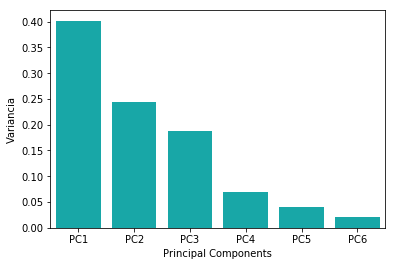

In [159]:
import seaborn as sns
df = pd.DataFrame({'Variancia':pca.explained_variance_ratio_,
             'Principal Components':['PC1','PC2','PC3','PC4','PC5','PC6']})
sns.barplot(x='Principal Components',y="Variancia", data=df, color="c");

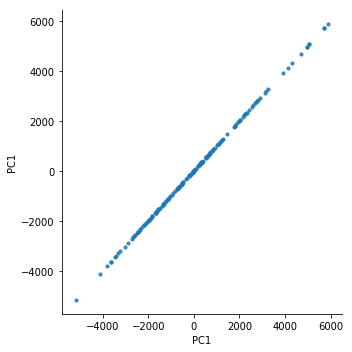

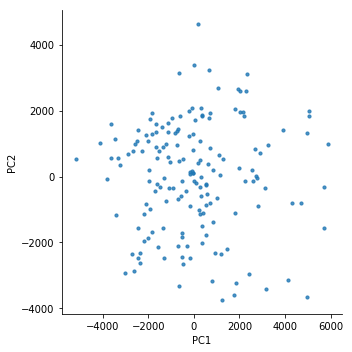

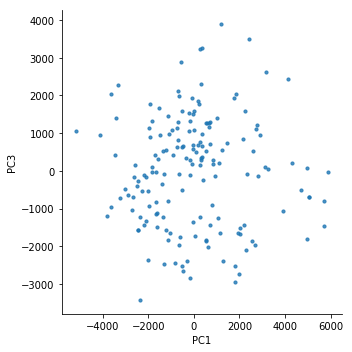

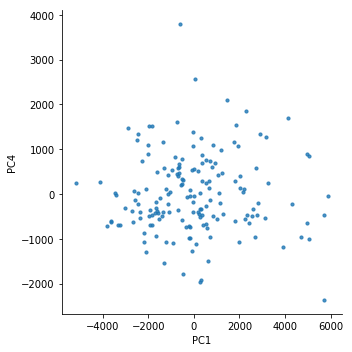

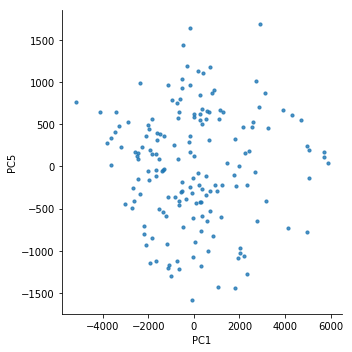

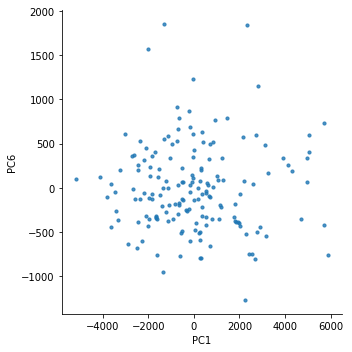

In [160]:
pc = pca.fit_transform(X)
pc_df = pd.DataFrame(data = pc , 
        columns = ['PC1','PC2','PC3','PC4','PC5','PC6'])
pc_df.head()
for i in range(6):
    sns.lmplot( x="PC1", y="PC"+str(i+1),
      data=pc_df, 
      fit_reg=False, 
      legend=True,
      scatter_kws={"s": 10}) # specify the point size

# Train Test Split

In [161]:
# Train test split
# Aplicar pca fit apenas no train_x
# Aplicar pca transform em tudo

from sklearn.model_selection import train_test_split

label_count1 = len(Dataset_0[Dataset_0['Label'] == 1])
label_count0 = len(Dataset_0[Dataset_0['Label'] == 0])

print(label_count1, label_count0)

# Retiradas amostras 71 a 139

train_x, test_x, train_y, test_y = train_test_split(X, Dataset_0['Label'], test_size=0.3, random_state=0)
train_x_w, test_x_w, train_y_w, test_y_w = train_test_split(X_w, Dataset_0_wilson['Label'], test_size=0.3, random_state=0)
print('Shape padrão: ')
print(train_x.shape, test_x.shape)
print('Shape wilson: ')
print(train_x.shape, test_x.shape)

pca = PCA(.95)
pca.fit(train_x)
train_x = pca.transform(train_x)
test_x = pca.transform(test_x)

print(train_x.shape, test_x.shape) # verificar shape após transform -> numero de features da pca
print(pca.n_components_)

83 83
Shape padrão: 
(116, 46) (50, 46)
Shape wilson: 
(116, 46) (50, 46)
(116, 6) (50, 6)
6


# Logistic Regression

In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import f1_score, roc_auc_score

def logistic_reg(train_x, test_x, train_y, test_y):
    log_result = {}
    F1_score = {}
    AUC_score = {}
    for solver in ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']:
        log_result[solver] = {}
        F1_score[solver] = {}
        AUC_score[solver] = {}
        for penalty in ['l2', 'l1', 'elasticnet', None]:
            try:
                logisticRegr = LogisticRegression(penalty=penalty, solver=solver)
                logisticRegr.fit(train_x, train_y)

                pred_y = logisticRegr.predict(test_x)
                pred_y_proba = logisticRegr.predict_proba(test_x)[:, 1]

                F1_score[solver][penalty] = f1_score(test_y, pred_y)
                AUC_score[solver][penalty] = roc_auc_score(test_y, pred_y_proba)

                score = logisticRegr.score(test_x, test_y)
                log_result[solver][penalty] = score
            except:
                pass
    return log_result, F1_score, AUC_score

In [163]:
log_padrao, f1_padrao, auc_padrao = logistic_reg(train_x, test_x, train_y, test_y)
log_wilson, f1_wilson, auc_wilson = logistic_reg(train_x_w, test_x_w, train_y_w, test_y_w)

/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conver

In [164]:
print('Para a filtragem PADRÃO:')
print("Score is: {}".format(log_padrao))
print("F1 score is: {}".format(F1_score))
print("ROC AUC Score is: {}".format(auc_wilson))

print('Para a filtragem por WILSON:')
print("Score is: {}".format(log_wilson))
print("F1 score is: {}".format(f1_wilson))
print("ROC AUC Score is: {}".format(auc_wilson))

# max(stats.iteritems(), key=operator.itemgetter(1))[0] pra pegar o valor máximo em dict

Para a filtragem PADRÃO:
Score is: {'newton-cg': {'l2': 0.86}, 'lbfgs': {'l2': 0.86}, 'liblinear': {'l2': 0.86, 'l1': 0.86}, 'sag': {'l2': 0.86}, 'saga': {'l2': 0.86, 'l1': 0.86}}
F1 score is: {'newton-cg': {'l2': 0.8372093023255814}, 'lbfgs': {'l2': 0.8372093023255814}, 'liblinear': {'l2': 0.8095238095238095, 'l1': 0.8372093023255814}, 'sag': {'l2': 0.7804878048780488}, 'saga': {'l2': 0.7804878048780488, 'l1': 0.7804878048780488}}
ROC AUC Score is: {'newton-cg': {'l2': 0.9675324675324675}, 'lbfgs': {'l2': 0.974025974025974}, 'liblinear': {'l2': 0.952922077922078, 'l1': 0.961038961038961}, 'sag': {'l2': 0.9659090909090908}, 'saga': {'l2': 0.9561688311688312, 'l1': 0.9659090909090908}}
Para a filtragem por WILSON:
Score is: {'newton-cg': {'l2': 0.86}, 'lbfgs': {'l2': 0.94}, 'liblinear': {'l2': 0.86, 'l1': 0.88}, 'sag': {'l2': 0.88}, 'saga': {'l2': 0.92, 'l1': 0.88}}
F1 score is: {'newton-cg': {'l2': 0.8571428571428572}, 'lbfgs': {'l2': 0.9302325581395349}, 'liblinear': {'l2': 0.85106382

# Random Forests

In [165]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [166]:
def random_forest(train_x, test_x, train_y, test_y):
    rf_results = {}
    F1_score = {}
    AUC_score = {}

    for i in [10, 50, 100, 200, 250, 500]:
        rf_results[i] = {}
        F1_score[i] = {}
        AUC_score[i] = {}

        for depth in [2, 4, 6, 8, 10]:

            rf = RandomForestClassifier(n_estimators=i, max_depth=depth,
                                         random_state=0)
            rf.fit(train_x, train_y)

            rf.feature_importances_

            pred_y = rf.predict(test_x)
            pred_y_proba = rf.predict_proba(test_x)[:, 1]

            F1_score[i][depth] = f1_score(test_y, pred_y)
            AUC_score[i][depth] = roc_auc_score(test_y, pred_y_proba)

            score = rf.score(test_x, test_y)

            rf_results[i][depth] = score, depth
            
    return rf_results, F1_score, AUC_score

In [167]:
log_padrao, f1_padrao, auc_padrao = random_forest(train_x, test_x, train_y, test_y)
log_wilson, f1_wilson, auc_wilson = random_forest(train_x_w, test_x_w, train_y_w, test_y_w)

In [168]:
print('Para a filtragem PADRÃO:')
print("Score is: {}".format(log_padrao))
print("F1 score is: {}".format(F1_score))
print("ROC AUC Score is: {}".format(auc_wilson))

print('Para a filtragem por WILSON:')
print("Score is: {}".format(log_wilson))
print("F1 score is: {}".format(f1_wilson))
print("ROC AUC Score is: {}".format(auc_wilson))

Para a filtragem PADRÃO:
Score is: {10: {2: (0.7, 2), 4: (0.82, 4), 6: (0.8, 6), 8: (0.82, 8), 10: (0.82, 10)}, 50: {2: (0.9, 2), 4: (0.9, 4), 6: (0.9, 6), 8: (0.92, 8), 10: (0.92, 10)}, 100: {2: (0.9, 2), 4: (0.9, 4), 6: (0.92, 6), 8: (0.9, 8), 10: (0.9, 10)}, 200: {2: (0.9, 2), 4: (0.92, 4), 6: (0.92, 6), 8: (0.94, 8), 10: (0.94, 10)}, 250: {2: (0.9, 2), 4: (0.92, 4), 6: (0.92, 6), 8: (0.92, 8), 10: (0.92, 10)}, 500: {2: (0.9, 2), 4: (0.92, 4), 6: (0.92, 6), 8: (0.92, 8), 10: (0.92, 10)}}
F1 score is: {'newton-cg': {'l2': 0.8372093023255814}, 'lbfgs': {'l2': 0.8372093023255814}, 'liblinear': {'l2': 0.8095238095238095, 'l1': 0.8372093023255814}, 'sag': {'l2': 0.7804878048780488}, 'saga': {'l2': 0.7804878048780488, 'l1': 0.7804878048780488}}
ROC AUC Score is: {10: {2: 0.9837662337662337, 4: 0.9594155844155844, 6: 0.9724025974025974, 8: 0.9659090909090909, 10: 0.9659090909090909}, 50: {2: 0.9659090909090908, 4: 0.9610389610389611, 6: 0.9594155844155845, 8: 0.9626623376623377, 10: 0.9650

# Support Vector Machine

In [151]:
from sklearn import svm

def support_vector(train_x, test_x, train_y, test_y):
    svm_score = {}
    F1_score = {}
    AUC_score = {}
    for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
        svm_score[kernel] = {}
        F1_score[kernel] = {}
        AUC_score[kernel] = {}
        for c in [0.1, 0.5, 1.0]:
            print(kernel, c)
            F1_score[kernel][c] = {}
            AUC_score[kernel][c] = {}
            for shape in ['ovo', 'ovr']:
                svmm = svm.SVC(C=c, kernel=kernel, gamma='scale', decision_function_shape='ovo', probability=True)
                svmm.fit(train_x, train_y)

                #svmm.support_vectors_

                pred_y = svmm.predict(test_x)
                pred_y_proba = svmm.predict_proba(test_x)[:, 1]

                F1_score[kernel][c][shape] = f1_score(test_y, pred_y)
                AUC_score[kernel][c][shape] = roc_auc_score(test_y, pred_y_proba)

                svm_score[kernel][c][shape] = svmm.score(test_x, test_y)
                
    return svm_score, F1_score, AUC_score

In [152]:
log_padrao, f1_padrao, auc_padrao = support_vector(train_x, test_x, train_y, test_y)
log_wilson, f1_wilson, auc_wilson = support_vector(train_x_w, test_x_w, train_y_w, test_y_w)

linear 0.1


KeyboardInterrupt: 

In [ ]:
print('Para a filtragem PADRÃO:')
print("Score is: {}".format(log_padrao))
print("F1 score is: {}".format(F1_score))
print("ROC AUC Score is: {}".format(auc_wilson))

print('Para a filtragem por WILSON:')
print("Score is: {}".format(log_wilson))
print("F1 score is: {}".format(f1_wilson))
print("ROC AUC Score is: {}".format(auc_wilson))

# XGBoost

In [169]:
import xgboost as xgb

In [170]:
# https://www.kaggle.com/syd359/train-a-xgboost-classifier

def xgboost_model(train_x, test_x, train_y, test_y):

    useTrainCV=True
    cv_folds=5
    early_stopping_rounds=50

    alg = xgb.XGBClassifier(learning_rate=0.01, n_estimators=200, max_depth=5,
                            min_child_weight=3, gamma=0.2, subsample=0.6, colsample_bytree=1.0,
                            objective='binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

    if useTrainCV:
        print("Start Feeding Data")
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(train_x, label=train_y)
        # xgtest = xgb.DMatrix(test_x, label=test_y)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
                          early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])

    print('Start Training')
    alg.fit(train_x, train_y, eval_metric='auc')

    print("Start Predicting")
    predictions = alg.predict(test_x)
    pred_proba = alg.predict_proba(test_x)[:, 1]
    
    return metrics.accuracy_score(test_y, predictions), metrics.f1_score(test_y, predictions), metrics.roc_auc_score(test_y, pred_proba)

#     print("Scores")
#     print("Accuracy : %.4g" % metrics.accuracy_score(test_y, predictions))
#     print("ROC AUC: %f" % metrics.roc_auc_score(test_y, pred_proba))
#     print("F1 Score: %f" % metrics.f1_score(test_y, predictions))

In [171]:
log_padrao, f1_padrao, auc_padrao = xgboost_model(train_x, test_x, train_y, test_y)
log_wilson, f1_wilson, auc_wilson = xgboost_model(train_x_w, test_x_w, train_y_w, test_y_w)

Start Feeding Data


/home/luiza/.local/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Start Training
Start Predicting
Start Feeding Data


/home/luiza/.local/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Start Training
Start Predicting


In [173]:
print('Para a filtragem PADRÃO:')
print("Score is: {}".format(log_padrao))
print("F1 score is: {}".format(F1_score))
print("ROC AUC Score is: {}".format(auc_wilson))

print('Para a filtragem por WILSON:')
print("Score is: {}".format(log_wilson))
print("F1 score is: {}".format(f1_wilson))
print("ROC AUC Score is: {}".format(auc_wilson))

Para a filtragem PADRÃO:
Score is: 0.88
F1 score is: {'newton-cg': {'l2': 0.8372093023255814}, 'lbfgs': {'l2': 0.8372093023255814}, 'liblinear': {'l2': 0.8095238095238095, 'l1': 0.8372093023255814}, 'sag': {'l2': 0.7804878048780488}, 'saga': {'l2': 0.7804878048780488, 'l1': 0.7804878048780488}}
ROC AUC Score is: 0.9431818181818181
Para a filtragem por WILSON:
Score is: 0.88
F1 score is: 0.88
ROC AUC Score is: 0.9431818181818181
